In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

### 3-(2)

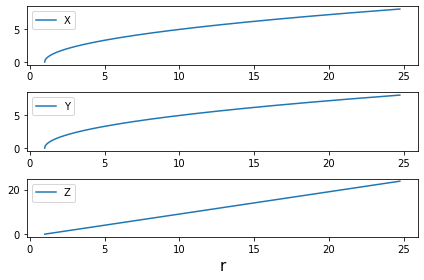

In [44]:
# 3-(2)
r = np.linspace(1,24.74,1000)
x = np.sqrt(8/3*(r-1))
y = x
z = r-1

fig, axes = plt.subplots(nrows=3, ncols=1)

axes[0].plot(r,x,label = 'X')
axes[1].plot(r,y,label = 'Y')
axes[2].plot(r,z,label = 'Z')
for i in range(0,len(axes)):
    axes[i].legend(loc='upper left')
    plt.xlabel('r', fontsize=15)

fig.tight_layout()

In [ ]:
# 3D Graph
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
X, Y = np.meshgrid(x,y)
Z = 3/8*np.power(X,2)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.xlabel('X')
plt.ylabel('Y')
plt.clabel('Z')

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%d'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### 3-(3)

In [28]:
J = np.array([[2,0,1],[0,8 ,1],[1, 0, -2]])
1/24*np.linalg.matrix_power(J,3)

array([[ 0.41666667,  0.        ,  0.20833333],
       [ 0.33333333, 21.33333333,  2.20833333],
       [ 0.20833333,  0.        , -0.41666667]])

In [29]:
def RK4(u, h, s=10, r=28, b=2.667):
    J = np.array([[-s,s,0],[1,-1 ,-np.sqrt(b*(r-1))],[np.sqrt(b*(r-1)), np.sqrt(b*(r-1)), -b]])

#     sig = np.eye(3) + h*J
    sig = np.eye(3) + h*J + 1/2*np.power(h,2)*np.linalg.matrix_power(J,2)+1/6*np.power(h,3)*np.linalg.matrix_power(J,3) + 1/24*np.power(h,4)*np.linalg.matrix_power(J,4)
    return np.dot(sig,u)

In [51]:
# 3-(3)
# J = np.array([[-10,10,0],[1,-28,0],[27,27,-8/3]])

# initial values
t_0 = 0
t_last = 70
u_0 = np.array([-0.001+0.00001,-0.001,0])
# u_0 = np.array([0., 1., 1.05])

# total values: i = 0,1,2,..., N
t_s = [t_0]
u_s = np.expand_dims(u_0, axis=0)


h = 0.01
n_steps = int(np.floor(t_last/h))

for i in range(0,n_steps): #[0]:
    t_temp = t_s[i]
    u_temp = u_s[i,:]
    
    # Numerical Method: RK4
    u = RK4(u_temp, h)
    
#     TR
#     mat_A = np.linalg.inv(np.eye(3)-h/2*J)
#     mat_B = np.eye(3)+h/2*J
#     u = np.dot(np.dot(mat_A,mat_B),u_temp)
    
#     print(u_s,u)
    
    # stack next values
    t_s.append(t_temp+h)
    u = np.expand_dims(u, axis=0)
    u_s = np.concatenate((u_s, u), axis=0)

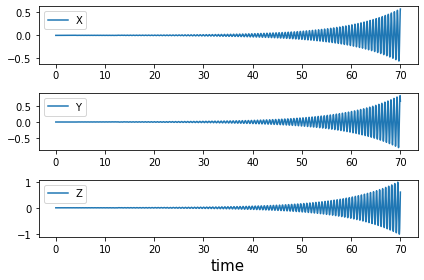

In [52]:
x = u_s[:,0]
y = u_s[:,1]
z = u_s[:,2]

# Plot
fig, axes = plt.subplots(nrows=3, ncols=1)

axes[0].plot(t_s,x,label = 'X')
axes[1].plot(t_s,y,label = 'Y')
axes[2].plot(t_s,z,label = 'Z')
plt.xlabel('time', fontsize=15)
for i in range(0,len(axes)):
    axes[i].legend()
    
fig.tight_layout()

Text(0.5, 0.92, 'Lorenz Attractor')

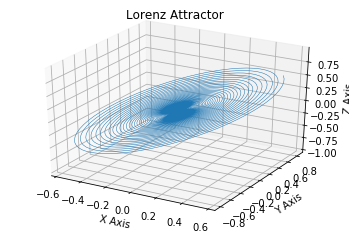

In [53]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(x, y, z, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

In [164]:
lam1 = -8/3
lam2 = -14+7.572j

In [171]:
2.79/np.linalg.norm(lam2)

0.1752897203524759

In [21]:
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
solve((x+10)*x*(x+8/3)-38/3*x-80, x)

[-10.6456789894221 + 0.e-20*I,
 -3.93211733445769 + 0.e-20*I,
 1.91112965721309 - 0.e-22*I]

In [22]:
solve((x+10)*(x+1)*(x+8/3)-10*x-80/3, x)

[-11.0000000000000, -2.66666666666667, 0.0]